### Analysis of 60Co correlation data

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Co60Analysis import *

#%load_ext snakeviz

#### Select the runs you wish to analyze

In [2]:
runs = ['C:/data/20220120_154253/']

#### Processing.....

1. instantiate the Co60Analysis class
2. loop over all the data

In [3]:
# 1....
myCo60 = Co60Analysis(runs=runs, dt_max=10)
# 2....
#%snakeviz 
myCo60.process_data(max_files=20)

DT5550:: no data files specified.... re-initialize before use
Co60Analysis:: Begin processing data....
DT5550:: Data recorded with config:  C:/data/20220120_154253\config_20220120_154253.json
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_0.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_1.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_2.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_3.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_4.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_5.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_6.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_7.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_8.raw
DT5550:: Open data file: C:/data/20220120_154253\data_20220120_154253_9.raw
DT5550:: Open data file: C:/data/20220120_154253

#### Analyzing

1. calculate the rate corrections from the tags with the reference detector
2. tag and count events
3. fit the 4th order legendre polynomial to verify the $^{60}$Ni spin structure

1 0
            fit parameters = [2464.53789279 1332.17935389   30.65989048]
2 0
            fit parameters = [2335.45039202 1334.39103724   31.15272858]
3 0
            fit parameters = [2411.38510279 1333.67989494   35.81858419]
4 0
            fit parameters = [2349.34901757 1335.8200122    39.17982287]
5 0
            fit parameters = [2411.32536981 1332.37691939   32.34898082]
6 0
            fit parameters = [2619.92469649 1332.46500465   32.68969196]
0 1
            fit parameters = [2445.80857108 1332.0258604    27.50500364]
2 1
            fit parameters = [2581.222955   1332.37465236   31.55112572]
3 1
            fit parameters = [2415.20045637 1333.72968533   34.82891223]
4 1
            fit parameters = [2272.99774211 1336.08492512   39.73846405]
5 1
            fit parameters = [2452.47469368 1332.51853852   33.03232065]
6 1
            fit parameters = [2464.83299471 1330.99036164   32.90583849]
0 2
            fit parameters = [2333.55254808 1332.13715423   27.4502462 ]

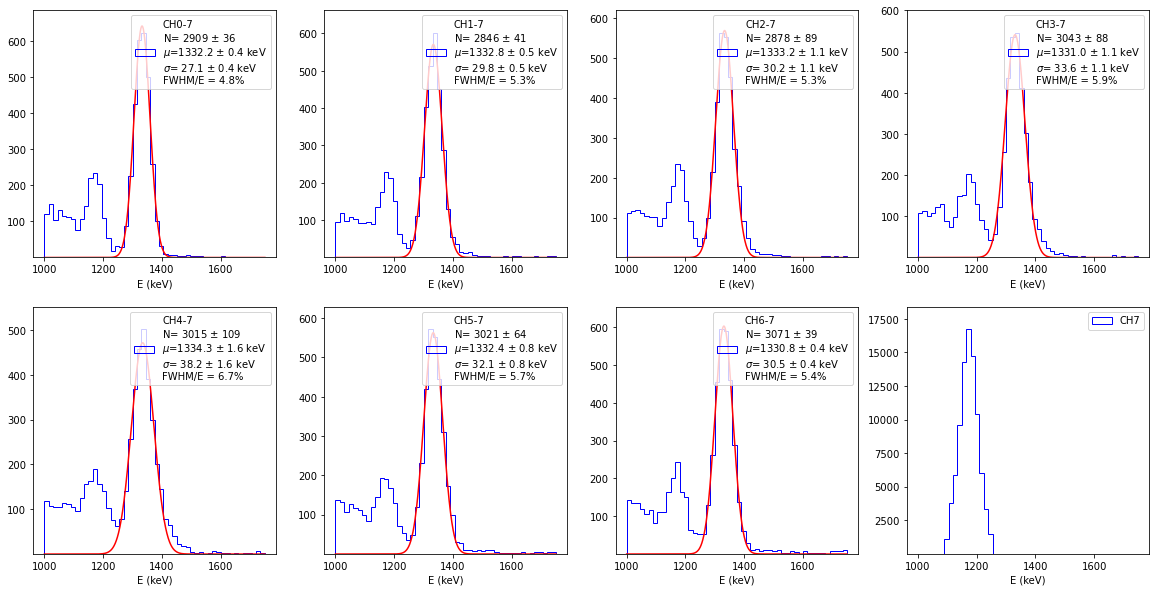

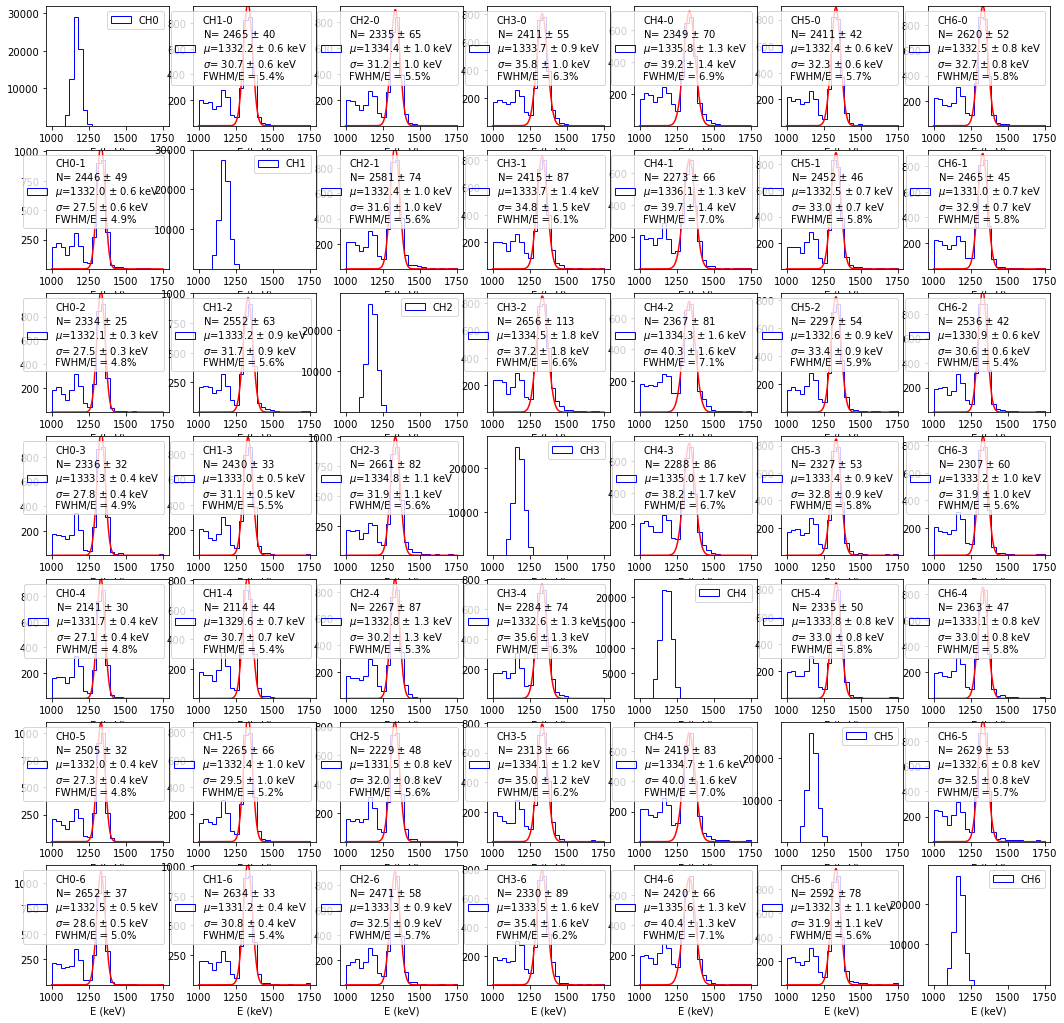

In [20]:
tag = '1173keV' # 1173keV # 1332keV
myCo60.dt_max = 20000
# calculate the corrections
myCo60.calculate_corrections(tagged_peak=tag, range=(1000, 1750), bins=50)
# calculate the correlations
myCo60.rate_correction = np.ones(8)
myCo60.correlation_analysis(tagged_peak=tag, range=(1000,1750), bins=25)

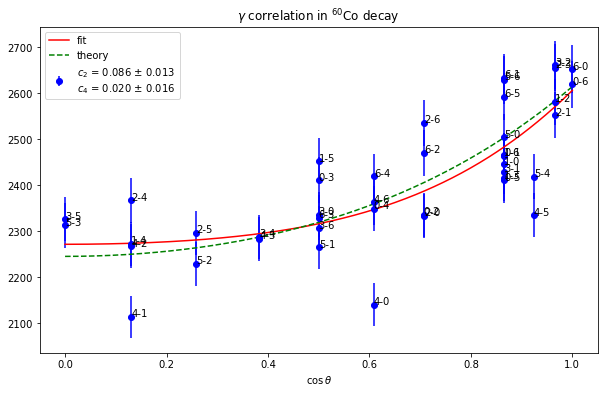

In [21]:
myCo60.correlation_fit()